# Optimisation: PSO

This example shows you how to run a global optimisation with [PSO (particle swarm optimisation)](http://pints.readthedocs.io/en/latest/optimisers/pso.html).

For a more elaborate example of an optimisation, see: https://github.com/martinjrobins/pints/blob/master/examples/optimisation-first-example.ipynb

Running in parallel mode with population size 8
0: 34550731.7397
1: 34256971.3313
2: 34256971.3313
3: 34256971.3313
20: 151106.046444
40: 128615.879061
60: 128615.879061
80: 110449.391481
100: 110449.391481
120: 110449.391481
140: 110449.391481
160: 93092.1959502
180: 93092.1959502
200: 93092.1959502
220: 93092.1959502
240: 93092.1959502
260: 93092.1959502
280: 93092.1959502
300: 93092.1959502
320: 93092.1959502
340: 93092.1959502
Halting: No significant change for 200 iterations.
355: 93092.1959502
Score at true solution: 
91415.6807696
Found solution:          True parameters:
 1.50764811484689724e-02     1.49999999999999994e-02
 5.00390318976236529e+02     5.00000000000000000e+02


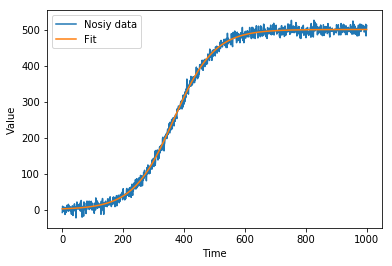

In [6]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
values = model.simulate(real_parameters, times)

# Add noise
values += np.random.normal(0, 10, values.shape)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Select a score function
score = pints.SumOfSquaresError(problem)

# Select some boundaries
boundaries = pints.Boundaries([0, 200], [1, 1000])

# Perform an optimization with boundaries and hints
x0 = [0, 700]
found_parameters, found_value = pints.pso(
    score,
    boundaries,
    x0
    )

# Show score of true solution
print('Score at true solution: ')
print(score(real_parameters))

# Compare parameters with original
print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

# Show quality of fit
pl.figure()
pl.xlabel('Time')
pl.ylabel('Value')
pl.plot(times, values, label='Nosiy data')
pl.plot(times, problem.evaluate(found_parameters), label='Fit')
pl.legend()
pl.show()